In [1]:
import sys
#change these paths to where they are located on your computer
sys.path.append("/Users/anirudhnatarajan/Documents/UPenn/McNeuron")
import McNeuron
import pickle
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
tree_data = pickle.load(open('.././trees/tree_data.csv', 'rb'))

In [3]:
trees = tree_data.sort_values(['location'])
trees = trees.reset_index(drop=True)

In [4]:
def splitTrees(location) :
    """
    splitTrees is used to quickly and efficiently split the data into usable chunks

    Parameters:
    -----------
    location: string
        the name of the location where the tree is from, matches exactly with the trees dataset, and is a string

    Return:
    -------
    splitTrees returns 2 lists of equal size that contain proper training and testing data

    """
    
    ind = np.where(trees['location']==location)[0]
    
    train = [0] * size
    test = [0] * size
    rand = np.linspace(0,totalTrees-1,totalTrees)
    
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        neuron = McNeuron.Neuron(trees['swc'][ind[int(rand[r])]])
        rand = np.delete(rand,r)
        neuron.setNormalizedFeatures()
        neuron.geometrical_features()
        neuron.motif_features()
        train[i] = neuron.getNeuronVector()
    
#     print('half')
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        neuron = McNeuron.Neuron(trees['swc'][ind[int(rand[r])]])
        rand = np.delete(rand,r)
        neuron.setNormalizedFeatures()
        neuron.geometrical_features()
        neuron.motif_features()
        test[i] = neuron.getNeuronVector()
        
    return train,test

In [5]:
import pandas as pd
neurons = pd.read_pickle("/Users/anirudhnatarajan/Documents/UPenn/neuronData/neurons.csv")

In [6]:
help1 = np.where(neurons['Secondary Brain Region']=='CA1')[0]
help2 = np.where(neurons['Species Name']=='mouse')[0]
index_to_see = np.intersect1d(help1,help2)

indA = np.where(neurons.iloc[index_to_see]['Secondary Cell Class']=='GABAergic')[0]
indP = np.where(neurons.iloc[index_to_see]['Secondary Cell Class']=='pyramidal')[0]
indS = np.where(neurons.iloc[index_to_see]['Secondary Cell Class']=='Somatostatin (SOM)-positive')[0]
indB = np.where(neurons.iloc[index_to_see]['Secondary Cell Class']=='basket')[0]
indT = np.where(neurons.iloc[index_to_see]['Secondary Cell Class']=='perisomatic targeting')[0]


def getSWC(ind) :
    length = len(ind)
    swc = [0] * length
    for i in range(0,length) :
        swc[i] = neurons['swc'][index_to_see[ind]][index_to_see[ind][i]]
    return swc

swcA = getSWC(indA)
swcP = getSWC(indP)
swcS = getSWC(indS)
swcB = getSWC(indB)
swcT = getSWC(indT)

In [7]:
def getVectors(swc, size) :
    train = [0] * size
    test = [0] * size
    rand = np.linspace(0,len(swc)-1,len(swc))
    
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        neuron = McNeuron.Neuron(swc[int(rand[r])])
        rand = np.delete(rand,r)
        neuron.setNormalizedFeatures()
        neuron.motif_features()
        neuron.geometrical_features()
        train[i] = neuron.getNeuronVector()

#     print('half')
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        neuron = McNeuron.Neuron(swc[int(rand[r])])
        rand = np.delete(rand,r)
        neuron.setNormalizedFeatures()
        neuron.motif_features()
        neuron.geometrical_features()
        test[i] = neuron.getNeuronVector()
    
#     print('done')
    return train,test

In [8]:
totalTrees = 20
size = int(totalTrees/2)

trainG, testG = splitTrees('Gabon')
print('done')
trainH, testH = splitTrees('Ghana')
print('done')
trainU, testU = splitTrees('UK')
print('done')
trainW, testW = splitTrees('Wytham Meteoc (UK)')
print('done')

trainA,testA = getVectors(swcA, size)
print('done')
trainP,testP = getVectors(swcP, size)
print('done')
trainS,testS = getVectors(swcS, size)
print('done')
trainB,testB = getVectors(swcB, size)
print('done')
trainT,testT = getVectors(swcT, size)
print('done')

done
done
done
done
done
done
done
done
done


In [9]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import neighbors
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model

In [10]:
def subsetData(arr,q):
    """
    subsetData is used to split the data into lists with only 1 classifying feature in order to test how important each feature is individually for classification

    Parameters:
    -----------
    arr: array or list
        the master array that contains all the features
    q: int
        the index of the desired feature

    Return:
    -------
    subsetData returns an array with only 1 classifying feature

    """
    
    x = [0] * len(arr)
    for i in range(0,len(arr)) :
        x[i] = arr[i][q]
    return x

In [12]:
for q in range(0,31) :
    a = subsetData(trainA,q)
    b = subsetData(trainP,q)
    c = subsetData(trainS,q)
    d = subsetData(trainB,q)
    e = subsetData(trainT,q)
    f = subsetData(trainG,q)
    g = subsetData(trainH,q)
    h = subsetData(trainU,q)
    i = subsetData(trainW,q)
    j = subsetData(testA,q)
    k = subsetData(testP,q)
    l = subsetData(testS,q)
    m = subsetData(testB,q)
    n = subsetData(testT,q)
    o = subsetData(testG,q)
    p = subsetData(testH,q)
    r = subsetData(testU,q)
    s = subsetData(testW,q)

    train = np.expand_dims(np.concatenate((a,b,c,d,e,f,g,h,i)),axis=1)
    test = np.expand_dims(np.concatenate((j,k,l,m,n,o,p,r,s)),axis=1)

    y = np.concatenate(([0] * size*5,[1] * size*4))
    clf = ExtraTreesClassifier()
    clf.fit(train,y)
    z = clf.predict(test)

    sum = 0
    parts = 2
    length = 0
    for i in range (0,parts) :
        for j in range (0,len(np.where(y==i)[0])) :
            if z[j + length] == i :
                sum += 1
        length += len(np.where(y==i)[0])
    accuracy = sum / len(z)
    print(accuracy, q)

0.6 0
0.6444444444444445 1
0.7333333333333333 2
0.8666666666666667 3
0.5555555555555556 4
0.4777777777777778 5
0.4777777777777778 6
0.9222222222222223 7
0.6 8
0.7 9
0.7666666666666667 10
0.5333333333333333 11
0.5555555555555556 12
0.6444444444444445 13
0.8222222222222222 14
0.8222222222222222 15
0.7888888888888889 16
0.7888888888888889 17
0.8 18
0.8222222222222222 19
0.8333333333333334 20
0.8 21
0.8333333333333334 22
0.6888888888888889 23
0.6777777777777778 24
0.7111111111111111 25
0.7333333333333333 26
0.6666666666666666 27
0.9555555555555556 28
0.9555555555555556 29
0.5777777777777777 30


In [13]:
def getFeatureImportance(length, featureNum) :
    """
    getFeatureImportance uses the subsetData function to generate a matrix with a large number of individual feature accuracies.

    Parameters:
    -----------
    length: int
        how many times the function will get new data and test the accuracy of individual features 
    featureNum: int
        the number of features needed to be tested

    Return:
    -------
    getFeatureImportance returns a matrix of shape (featureNum,length) with all values filled with the accuracy of each feature

    """
    
    masterFeature = np.zeros([featureNum, length])
    for t in range (0,length) :
        
        trainG, testG = splitTrees('Gabon')
        trainH, testH = splitTrees('Ghana')
        trainU, testU = splitTrees('UK')
        trainW, testW = splitTrees('Wytham Meteoc (UK)')
        print('done')

        trainA,testA = getVectors(swcA, size)
        trainP,testP = getVectors(swcP, size)
        trainS,testS = getVectors(swcS, size)
        trainB,testB = getVectors(swcB, size)
        trainT,testT = getVectors(swcT, size)
        print('done')
        
        for q in range(0,featureNum) :
            a = subsetData(trainA,q)
            b = subsetData(trainP,q)
            c = subsetData(trainS,q)
            d = subsetData(trainB,q)
            e = subsetData(trainT,q)
            f = subsetData(trainG,q)
            g = subsetData(trainH,q)
            h = subsetData(trainU,q)
            i = subsetData(trainW,q)
            j = subsetData(testA,q)
            k = subsetData(testP,q)
            l = subsetData(testS,q)
            m = subsetData(testB,q)
            n = subsetData(testT,q)
            o = subsetData(testG,q)
            p = subsetData(testH,q)
            r = subsetData(testU,q)
            s = subsetData(testW,q)

            train = np.expand_dims(np.concatenate((a,b,c,d,e,f,g,h,i)),axis=1)
            test = np.expand_dims(np.concatenate((j,k,l,m,n,o,p,r,s)),axis=1)

            y = np.concatenate(([0] * size*5,[1] * size*4))
            clf = ExtraTreesClassifier()
            clf.fit(train,y)
            z = clf.predict(test)

            sum = 0
            parts = 2
            length = 0
            for i in range (0,parts) :
                for j in range (0,len(np.where(y==i)[0])) :
                    if z[j + length] == i :
                        sum += 1
                length += len(np.where(y==i)[0])
            accuracy = sum / len(z)
            masterFeature[q][t] = accuracy
        print(t)
    return masterFeature

In [ ]:
totalTrees = 20
size = int(totalTrees/2)

featureNames = ['Width X', 'Height Y', 'Soma Radii', 'Soma Surface Area', \
                'Soma Volume', 'Skewness X', 'Skewness Y', 'Skewness Z', \
                'Euclidian Skewness', 'Length', 'Surface Area', \
                'Section Area', 'Volume', 'Average Radius', 'Tips', \
                'Stems', 'Branch Pt', 'Segments', 'branch branch', \
                'branch die', 'die die', 'global angle', 'local angle', \
                'distance from root', 'path_length/euclidean', \
                'mean Contraction', 'branch angle', 'side branch angle', \
                'mean segmental neural length', 'mean segmental euclidean length', \
                'segmental branch angle']
featureNum = len(featureNames)

masterFeature = getFeatureImportance(3, featureNum)

In [ ]:
"""
This cell uses the getFeatureImportance funtion to get a large amount of data and graph the
results on a bar graph
"""

values = np.zeros([3,featureNum])
for i in range(0,featureNum) :
    values[0,i] = masterFeature[i,:].mean()
    values[1,i] = masterFeature[i,:].std()
featureNames = np.vstack(featureNames)
index = np.argsort(values[0,:])
values[2] = index
featureRange = np.linspace(0,featureNum-1,featureNum)
plt.bar(featureRange,values[0,index], yerr = values[1,index])
plt.xticks(featureRange,featureNames[index,0], rotation='vertical')
plt.subplots_adjust(bottom=0.15)

plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/featureImportanceTreeVsNeuron.eps', dpi=300, bbox_inches = 'tight')
plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/featureImportanceTreeVsNeuron.png', dpi=300, bbox_inches = 'tight')

In [14]:
"""
Try out any of the following classifiers by uncommenting a line!
"""

#clf = svm.SVC()
#clf = RandomForestClassifier()
clf = ExtraTreesClassifier()
#clf = DecisionTreeClassifier()
#clf = GradientBoostingClassifier()
#clf = BaggingClassifier()
#clf = BaggingClassifier(ExtraTreesClassifier())
#clf = neighbors.KNeighborsClassifier()
#clf = SGDClassifier()
#clf = MLPClassifier()
#clf = GaussianNB()
#clf = linear_model.LinearRegression()

In [15]:
"""
Train the classifier and print the accuracy
"""

train = np.concatenate((trainA,trainP,trainS,trainB,trainT,trainG,trainH,trainU,trainW))
test = np.concatenate((testA,testP,testS,testB,testT,testG,testH,testU,testW))

accuracy = 0
while accuracy<1 :
    y = np.concatenate(([0] * size*5,[1] * size*4))
    clf.fit(train,y)
    z = clf.predict(test)

    sum = 0
    parts = 2
    length = 0
    for i in range (0,parts) :
        for j in range (0,len(np.where(y==i)[0])) :
            if z[j + length] == i :
                sum += 1
        length += len(np.where(y==i)[0])
    accuracy = sum / len(z)
    print(accuracy, sum)

1.0 90


Feature ranking:
1. feature 23 (0.181318)
2. feature 22 (0.105150)
3. feature 8 (0.103627)
4. feature 16 (0.099210)
5. feature 28 (0.064222)
6. feature 1 (0.062528)
7. feature 15 (0.052818)
8. feature 20 (0.050710)
9. feature 29 (0.041997)
10. feature 9 (0.033693)
11. feature 26 (0.024698)
12. feature 21 (0.024304)
13. feature 4 (0.024127)
14. feature 18 (0.021812)
15. feature 2 (0.021379)
16. feature 10 (0.017699)
17. feature 30 (0.015975)
18. feature 27 (0.014507)
19. feature 24 (0.012028)
20. feature 31 (0.011350)
21. feature 3 (0.005109)
22. feature 17 (0.004179)
23. feature 6 (0.003948)
24. feature 25 (0.003000)
25. feature 11 (0.000614)
26. feature 7 (0.000000)
27. feature 5 (0.000000)
28. feature 12 (0.000000)
29. feature 14 (0.000000)
30. feature 19 (0.000000)
31. feature 13 (0.000000)


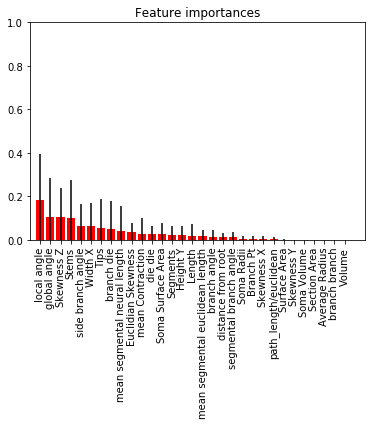

In [47]:
featureNames = ['Width X', 'Height Y', 'Soma Radii', 'Soma Surface Area', \
                'Soma Volume', 'Skewness X', 'Skewness Y', 'Skewness Z', \
                'Euclidian Skewness', 'Length', 'Surface Area', \
                'Section Area', 'Volume', 'Average Radius', 'Tips', \
                'Stems', 'Branch Pt', 'Segments', 'branch branch', \
                'branch die', 'die die', 'global angle', 'local angle', \
                'distance from root', 'path_length/euclidean', \
                'mean Contraction', 'branch angle', 'side branch angle', \
                'mean segmental neural length', 'mean segmental euclidean length', \
                'segmental branch angle']
featureNames = np.array(featureNames)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f]+1, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train.shape[1]), featureNames[indices], rotation='vertical')

plt.xlim([-1, train.shape[1]])
plt.axis([-1,32,0,1])
# plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/featureImportanceTreeVsNeuronNew.eps', dpi=300, bbox_inches = 'tight')
# plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/featureImportanceTreeVsNeuronNew.png', dpi=300, bbox_inches = 'tight')

In [ ]:
"""
This histogram gives you the breakdown of what the classifier predicted on the test values
"""

plt.hist(z)
print(len(np.where(z == 0)[0]))
print(len(np.where(z == 1)[0]))

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, verbose=2).fit_transform(train)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, marker='x')
#plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Misc/treeNeuronClassificationTSNE.eps')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train,y)
X_embedded = pca.fit_transform(train,y)

fig,ax = plt.subplots(1)
ax.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=10)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_xticklabels([])
fig.dpi=300

# fig.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/treeNeuronClassificationPCA.eps')
# fig.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/treeNeuronClassificationPCA.png')

## Plotting the Feature Importance

In [20]:
import pickle
valuesT = pickle.load(open('featureImportanceTree','rb'))
valuesN = pickle.load(open('featureImportanceNeuron','rb'))
valuesTN = pickle.load(open('featureImportanceTreeNeuron','rb'))

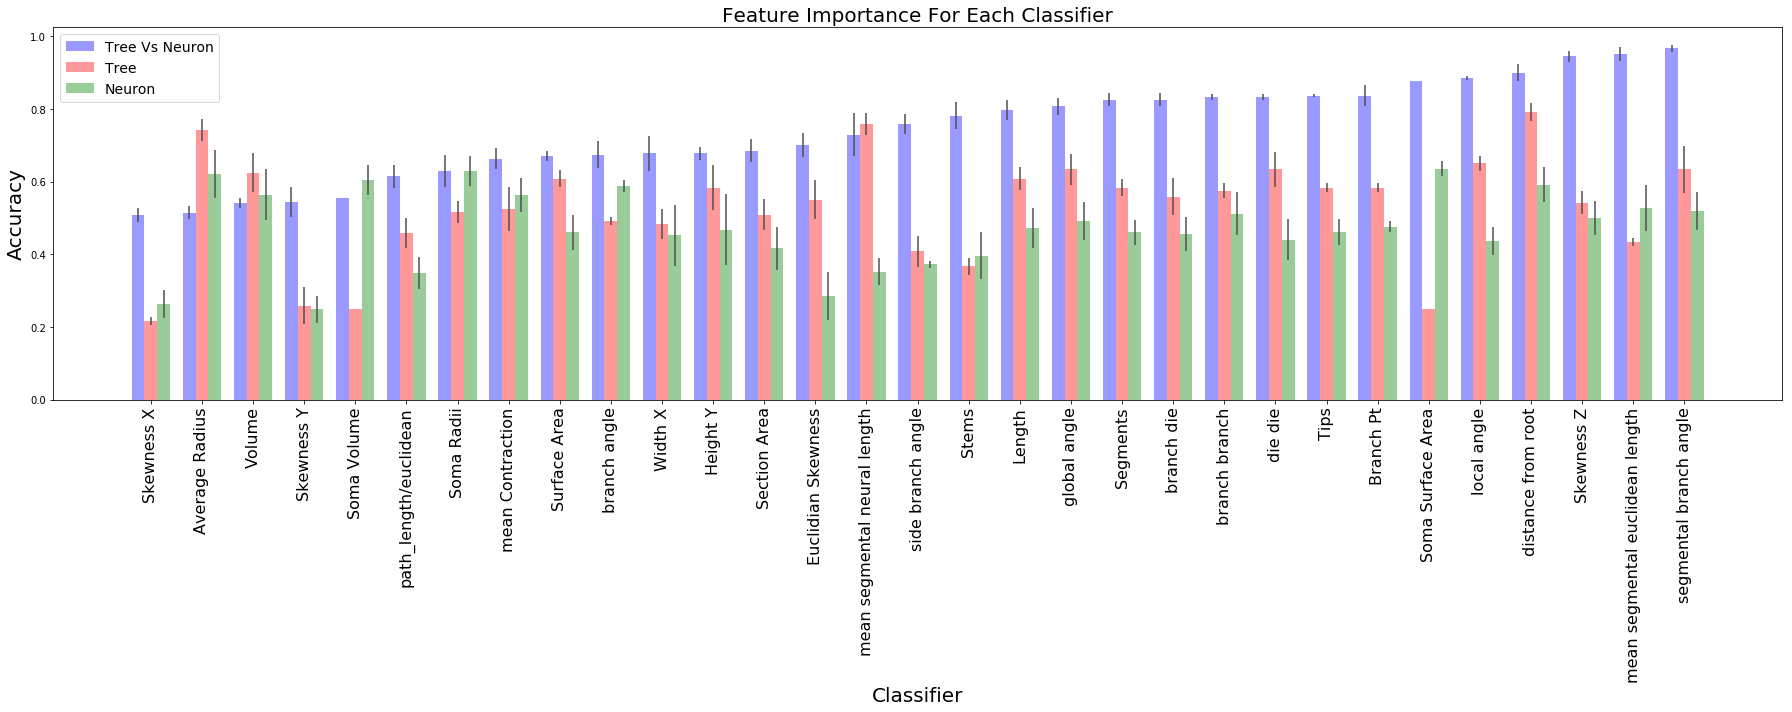

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

featureNames = np.array(['Width X', 'Height Y', 'Soma Radii', 'Soma Surface Area', \
                'Soma Volume', 'Skewness X', 'Skewness Y', 'Skewness Z', \
                'Euclidian Skewness', 'Length', 'Surface Area', \
                'Section Area', 'Volume', 'Average Radius', 'Tips', \
                'Stems', 'Branch Pt', 'Segments', 'branch branch', \
                'branch die', 'die die', 'global angle', 'local angle', \
                'distance from root', 'path_length/euclidean', \
                'mean Contraction', 'branch angle', 'side branch angle', \
                'mean segmental neural length', 'mean segmental euclidean length', \
                'segmental branch angle'])

n_groups = len(featureNames)

fig, ax = plt.subplots(figsize=(25, 10))

index = valuesTN[2].astype(int)
bar_width = 1/4

opacity = 0.4
error_config = {'ecolor': '0.3'}

def getInd(start) :
    ind = [0] * n_groups
    for i in range(0,n_groups) :
        ind[i] = start + i*bar_width*4
    return ind

rects1Ind = getInd(0)
rects2Ind = getInd(bar_width)
rects3Ind = getInd(bar_width*2)

rects1 = ax.bar(rects1Ind, valuesTN[0][index], bar_width,
                alpha=opacity, color='b',
                yerr=valuesTN[1][index], error_kw=error_config,
                label='Tree Vs Neuron')

rects2 = ax.bar(rects2Ind, valuesT[0][index], bar_width,
                alpha=opacity, color='r',
                yerr=valuesT[1][index], error_kw=error_config,
                label='Tree')

rects3 = ax.bar(rects3Ind, valuesN[0][index], bar_width,
                alpha=opacity, color='g',
                yerr=valuesN[1][index], error_kw=error_config,
                label='Neuron')

# rects4 = ax.bar(np.arange(n_groups) + bar_width*3, [0]*n_groups, bar_width,
#                 alpha=0, color='w',
#                 yerr=[0]*n_groups, error_kw=error_config)

plt.rc('legend', fontsize=14)

ax.set_xlabel('Classifier', fontsize=20)
ax.set_ylabel('Accuracy', fontsize=20)
ax.set_title('Feature Importance For Each Classifier', fontsize=20)
ax.set_xticks(np.arange(31) + bar_width)
ax.set_xticklabels(featureNames[index], rotation='vertical', fontsize=16)
ax.legend()

fig.tight_layout()

# plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/featureImportanceMaster.eps', dpi = 300)
# plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/featureImportanceMaster.png', dpi = 300)

In [40]:
import pickle
valuesT = pickle.load(open('featureImportanceTNew','rb'))
valuesN = pickle.load(open('featureImportanceNNew','rb'))
valuesTN = pickle.load(open('featureImportanceTNNew','rb'))

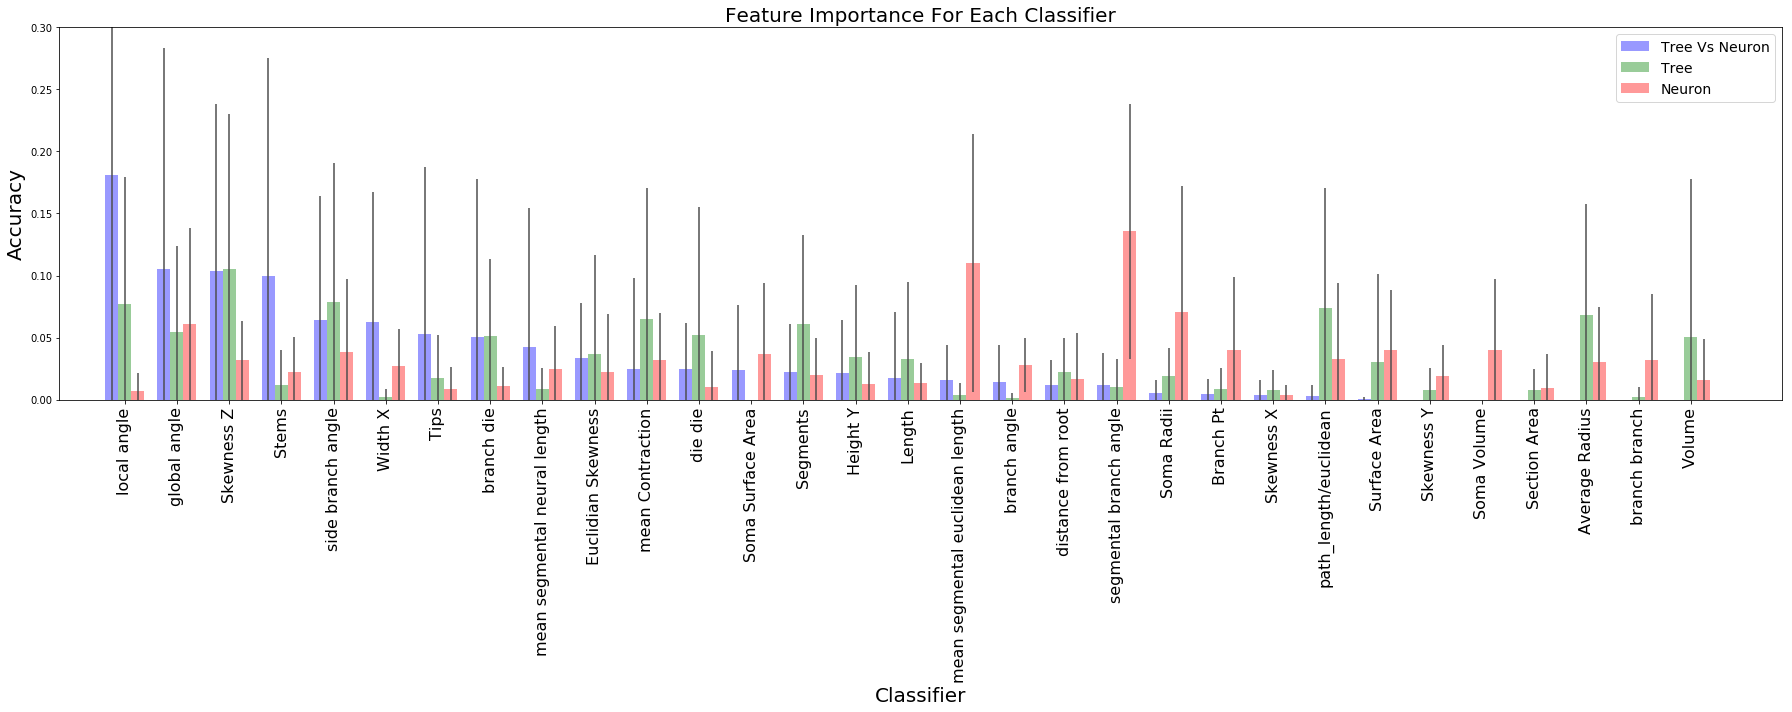

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

featureNames = np.array(['Width X', 'Height Y', 'Soma Radii', 'Soma Surface Area', \
                'Soma Volume', 'Skewness X', 'Skewness Y', 'Skewness Z', \
                'Euclidian Skewness', 'Length', 'Surface Area', \
                'Section Area', 'Volume', 'Average Radius', 'Tips', \
                'Stems', 'Branch Pt', 'Segments', 'branch branch', \
                'branch die', 'die die', 'global angle', 'local angle', \
                'distance from root', 'path_length/euclidean', \
                'mean Contraction', 'branch angle', 'side branch angle', \
                'mean segmental neural length', 'mean segmental euclidean length', \
                'segmental branch angle'])

n_groups = len(featureNames)

fig, ax = plt.subplots(figsize=(25, 10))

index = valuesTN[2].astype(int)
bar_width = 1/4

opacity = 0.4
error_config = {'ecolor': '0.3'}

def getInd(start) :
    ind = [0] * n_groups
    for i in range(0,n_groups) :
        ind[i] = start + i*bar_width*4
    return ind

rects1Ind = getInd(0)
rects2Ind = getInd(bar_width)
rects3Ind = getInd(bar_width*2)

rects1 = ax.bar(rects1Ind, valuesTN[0][index], bar_width,
                alpha=opacity, color='b',
                yerr=valuesTN[1][index], error_kw=error_config,
                label='Tree Vs Neuron')

rects2 = ax.bar(rects2Ind, valuesT[0][index], bar_width,
                alpha=opacity, color='g',
                yerr=valuesT[1][index], error_kw=error_config,
                label='Tree')

rects3 = ax.bar(rects3Ind, valuesN[0][index], bar_width,
                alpha=opacity, color='r',
                yerr=valuesN[1][index], error_kw=error_config,
                label='Neuron')

# rects4 = ax.bar(np.arange(n_groups) + bar_width*3, [0]*n_groups, bar_width,
#                 alpha=0, color='w',
#                 yerr=[0]*n_groups, error_kw=error_config)

plt.rc('legend', fontsize=14)

ax.set_xlabel('Classifier', fontsize=20)
ax.set_ylabel('Accuracy', fontsize=20)
ax.set_title('Feature Importance For Each Classifier', fontsize=20)
ax.set_xticks(np.arange(31) + bar_width)
ax.set_xticklabels(featureNames[index], rotation='vertical', fontsize=16)
ax.legend()

plt.axis([-1,32,0,.3])
fig.tight_layout()

# plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/featureImportanceMasterNew.eps', dpi = 300)
# plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/featureImportanceMasterNew.png', dpi = 300)